[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 18** | Regressão Logística I | Exercício 29

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 06 de junho de 2025.

---

# Regressão Logística I

## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

sns.set(style="whitegrid")

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


## 1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:
tabela_bivariada = df.groupby('sex')['flag_doente'].agg(['sum', 'count'])
tabela_bivariada.columns = ['Doentes', 'Total']
tabela_bivariada['Saudáveis'] = tabela_bivariada['Total'] - tabela_bivariada['Doentes']
tabela_bivariada['Média de doentes'] = tabela_bivariada['Doentes'] / tabela_bivariada['Total']

In [6]:
tabela_bivariada['Odds'] = tabela_bivariada['Doentes'] / tabela_bivariada['Saudáveis']

In [7]:
total_doentes = df['flag_doente'].sum()
total_saudaveis = df.shape[0] - total_doentes
total_odds = total_doentes / total_saudaveis
tabela_bivariada['Odds Ratio'] = tabela_bivariada['Odds'] / total_odds

In [8]:
tabela_bivariada['Logito'] = np.log(tabela_bivariada['Odds'])

In [9]:
tabela_bivariada['WOE'] = np.log(tabela_bivariada['Odds Ratio'])

In [10]:
print(tabela_bivariada)

     Doentes  Total  Saudáveis  Média de doentes      Odds  Odds Ratio  \
sex                                                                      
0.0       25     97         72          0.257732  0.347222    0.409672   
1.0      114    206         92          0.553398  1.239130    1.461996   

      Logito       WOE  
sex                     
0.0 -1.05779 -0.892398  
1.0  0.21441  0.379802  


## 2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [11]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

In [13]:
grouped = df.groupby('age_group')['age'].agg(['mean', 'median', 'std', 'min', 'max'])
grouped.columns = ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo']

print(grouped)

               Média  Mediana  Desvio Padrão  Mínimo  Máximo
age_group                                                   
0-20             NaN      NaN            NaN     NaN     NaN
21-40      36.833333     37.5       2.895229    29.0    40.0
41-60      51.800971     53.0       5.927546    41.0    60.0
61-80      65.329114     65.0       3.481532    61.0    77.0
81-100           NaN      NaN            NaN     NaN     NaN


C:\Users\earap\AppData\Local\Temp\ipykernel_15812\1956740193.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('age_group')['age'].agg(['mean', 'median', 'std', 'min', 'max'])


In [14]:
mean_age = df['age'].mean()

print(f"Valor médio da variável 'age': {mean_age}")

Valor médio da variável 'age': 54.43894389438944


## 3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

C:\Users\earap\AppData\Local\Temp\ipykernel_15812\1908804527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['Média'], palette="viridis")


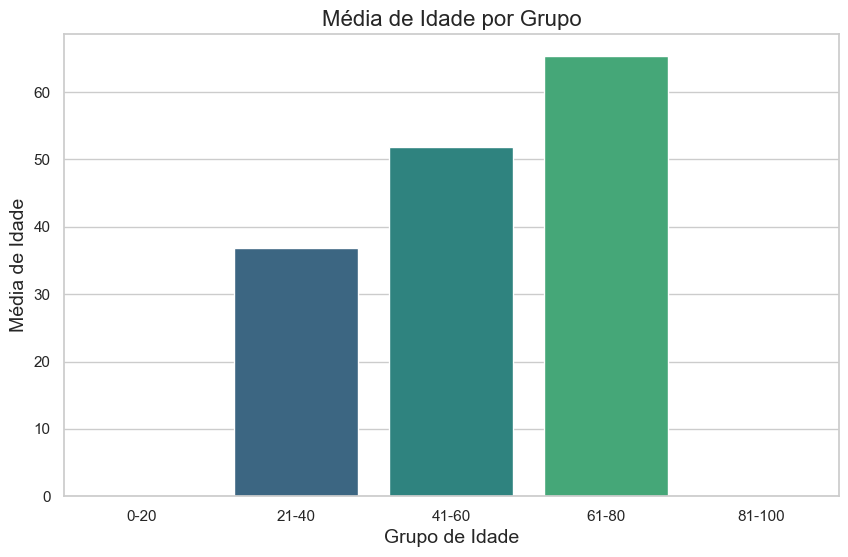

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped['Média'], palette="viridis")

plt.title("Média de Idade por Grupo", fontsize=16)
plt.xlabel("Grupo de Idade", fontsize=14)
plt.ylabel("Média de Idade", fontsize=14)

plt.show()

C:\Users\earap\AppData\Local\Temp\ipykernel_15812\668372357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='age', data=df, palette="Set2")


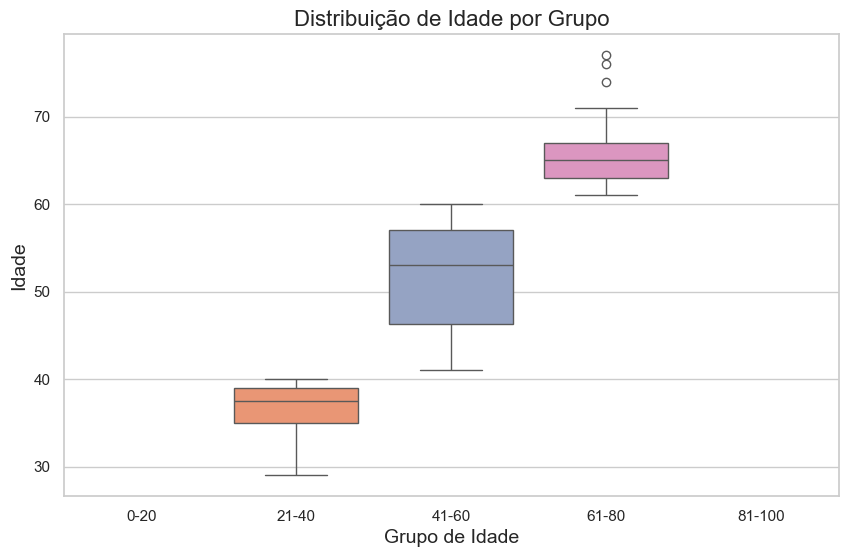

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='age', data=df, palette="Set2")

plt.title("Distribuição de Idade por Grupo", fontsize=16)
plt.xlabel("Grupo de Idade", fontsize=14)
plt.ylabel("Idade", fontsize=14)

plt.show()

C:\Users\earap\AppData\Local\Temp\ipykernel_15812\1645493015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='age_group', y='age', data=df, palette="coolwarm")


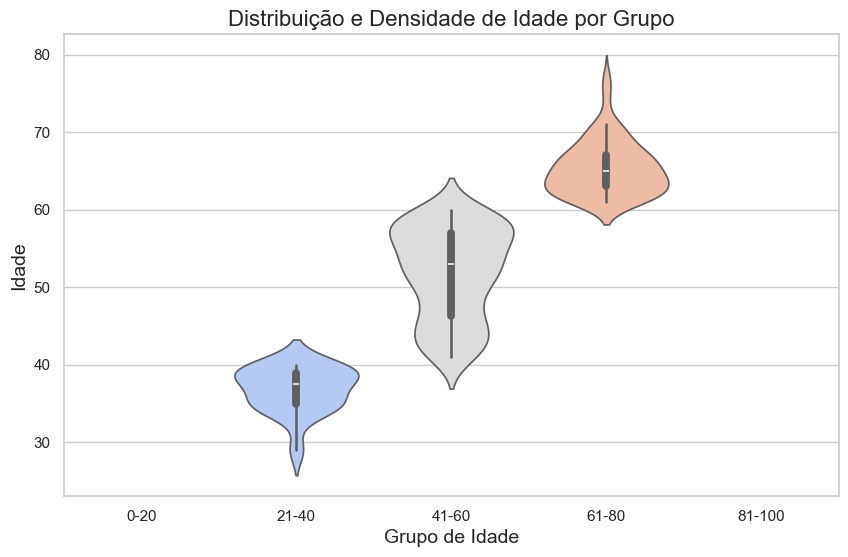

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='age_group', y='age', data=df, palette="coolwarm")

plt.title("Distribuição e Densidade de Idade por Grupo", fontsize=16)
plt.xlabel("Grupo de Idade", fontsize=14)
plt.ylabel("Idade", fontsize=14)

plt.show()